In [1]:

print ("Hello Capstone project course")

Hello Capstone project course


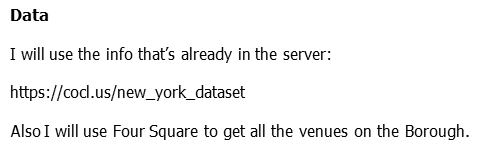

## **Introduction to the bussiness**

The Bronx is an historical Borough in NY. Also is one of the most crowded areas of the city. This research will led us to know which is the best neighborhood to establish a restaurant in The Bronx.
Following previous lab same premises:

..*Get data of The Bronx
..*Get venues from Foursquare
..*Cluster The Bronx in n different clusters, but previously do a cluster analysis. 
..*Select best cluster 




## **Data**

I will use the info that’s already in the server: 

https://cocl.us/new_york_dataset

Also I will use Four Square to get all the venues on the Borough. 

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import io
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import json # library to handle JSON files
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium 
import folium
!pip install geopy
from geopy.geocoders import Nominatim


In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [11]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of The Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of The Bronx are 40.8466508, -73.8785937.


In [13]:
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

In [14]:
CLIENT_ID = 'OC3ZF0D52XR5DGG5X2BDKOEPQ5JYRKMPEC5KKW0FKMIQ5OTO' # your Foursquare ID
CLIENT_SECRET = '2V5PVM5Q33RTSO43SK2DMPKTEQYUNRMAYNFYJUJPKTIFIV2A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OC3ZF0D52XR5DGG5X2BDKOEPQ5JYRKMPEC5KKW0FKMIQ5OTO
CLIENT_SECRET:2V5PVM5Q33RTSO43SK2DMPKTEQYUNRMAYNFYJUJPKTIFIV2A


In [15]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

In [16]:
neighborhood_latitude = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [17]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OC3ZF0D52XR5DGG5X2BDKOEPQ5JYRKMPEC5KKW0FKMIQ5OTO&client_secret=2V5PVM5Q33RTSO43SK2DMPKTEQYUNRMAYNFYJUJPKTIFIV2A&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0cefb8b0abf62c4ae911ca'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Walgreens,Pharmacy,40.896528,-73.844700
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Rite Aid,Pharmacy,40.896649,-73.844846
4,Dunkin',Donut Shop,40.890459,-73.849089


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
   
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
    
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )



Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [24]:
print(bronx_venues.shape)
bronx_venues.head()

(1200, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [25]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 169 uniques categories.


In [26]:
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Nightclub,Office,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
bronx_onehot.shape

(1200, 170)

In [28]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Nightclub,Office,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,Allerton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.076923,0.038462,0.038462,0.000000,0.038462,0.000000,0.00000,0.00000,0.038462,0.000000,0.038462,0.000000,0.038462,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.038462,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.153846,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Baychester,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [29]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.15
1       Deli / Bodega  0.08
2  Chinese Restaurant  0.08
3         Supermarket  0.08
4    Department Store  0.04


----Baychester----
                venue  freq
0          Donut Shop  0.10
1  Mexican Restaurant  0.05
2   Convenience Store  0.05
3       Shopping Mall  0.05
4           Pet Store  0.05


----Bedford Park----
                venue  freq
0  Chinese Restaurant  0.12
1         Pizza Place  0.10
2  Mexican Restaurant  0.10
3               Diner  0.10
4  Spanish Restaurant  0.05


----Belmont----
                venue  freq
0  Italian Restaurant  0.18
1         Pizza Place  0.08
2       Deli / Bodega  0.06
3              Bakery  0.05
4        Dessert Shop  0.03


----Bronxdale----
                venue  freq
0                Bank  0.08
1  Mexican Restaurant  0.08
2  Italian Restaurant  0.08
3      Breakfast Spot  0.08
4         Pizza Place  0.08


----Castle Hill----
                             venue  fre

                 venue  freq
0          Pizza Place  0.16
1  Fried Chicken Joint  0.11
2                 Bank  0.05
3       Sandwich Place  0.05
4           Shoe Store  0.05


----Van Nest----
                       venue  freq
0              Deli / Bodega  0.20
1                Pizza Place  0.20
2                Supermarket  0.05
3  Middle Eastern Restaurant  0.05
4         Chinese Restaurant  0.05


----Wakefield----
           venue  freq
0       Pharmacy  0.22
1   Dessert Shop  0.11
2     Laundromat  0.11
3  Deli / Bodega  0.11
4    Gas Station  0.11


----West Farms----
              venue  freq
0       Bus Station  0.18
1              Park  0.09
2          Bus Stop  0.09
3    Sandwich Place  0.05
4  Basketball Court  0.05


----Westchester Square----
                  venue  freq
0  Fast Food Restaurant  0.09
1        Sandwich Place  0.06
2              Pharmacy  0.06
3           Pizza Place  0.06
4            Donut Shop  0.06


----Williamsbridge----
                  venue  fre

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Supermarket,Cosmetics Shop,Pharmacy,Department Store,Dessert Shop,Discount Store,Martial Arts Dojo
1,Baychester,Donut Shop,Electronics Store,Mattress Store,Spanish Restaurant,Mexican Restaurant,Fast Food Restaurant,Bus Station,Shopping Mall,Men's Store,Fried Chicken Joint
2,Bedford Park,Chinese Restaurant,Diner,Mexican Restaurant,Pizza Place,Spanish Restaurant,Sandwich Place,Supermarket,Pharmacy,Deli / Bodega,Park
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Donut Shop,Grocery Store,Dessert Shop,Bank,Mexican Restaurant,Coffee Shop
4,Bronxdale,Spanish Restaurant,Gym,Performing Arts Venue,Chinese Restaurant,Paper / Office Supplies Store,Eastern European Restaurant,Mexican Restaurant,Breakfast Spot,Supermarket,Bank


In [32]:
kclusters = 6
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

kmeans.labels_[0:10] 

array([4, 4, 4, 3, 2, 2, 4, 2, 2, 4], dtype=int32)

In [33]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bronx_merged = bronx_data
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bronx_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,4,Pharmacy,Deli / Bodega,Ice Cream Shop,Dessert Shop,Sandwich Place,Laundromat,Gas Station,Donut Shop,Women's Store,Eastern European Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,4,Fast Food Restaurant,Pizza Place,Discount Store,Bus Station,Basketball Court,Baseball Field,Grocery Store,Park,Bagel Shop,Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,4,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Intersection,Seafood Restaurant,Pizza Place,Bus Stop,Bowling Alley,Metro Station
3,Bronx,Fieldston,40.895437,-73.905643,5,Plaza,Bus Station,Women's Store,Donut Shop,Food,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Electronics Store
4,Bronx,Riverdale,40.890834,-73.912585,2,Park,Bus Station,Plaza,Baseball Field,Bank,Gym,Locksmith,Dive Bar,Dessert Shop,Food


In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
x=bronx_grouped_clustering
x[0:5]

,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Nightclub,Office,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.038462,0.000000,0.076923,0.0,0.000000,0.0,0.0,0.0,0.000000,0.038462,0.0,0.076923,0.038462,0.038462,0.000000,0.038462,0.0,0.0,0.0,0.038462,0.000000,0.038462,0.0,0.038462,0.0,0.000000,0.0,0.000000,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.038462,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.038462,0.000000,0.153846,0.038462,0.000000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.047619,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.047619,0.047619,0.0,0.000000,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.0,0.095238,0.000000,0.047619,0.0,0.047619,0.0,0.000000,0.0,0.000000,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047619,0.000000,0.047

In [36]:
y=bronx_grouped['Neighborhood']
y[0:5]

0        Allerton
1      Baychester
2    Bedford Park
3         Belmont
4       Bronxdale
Name: Neighborhood, dtype: object

In [37]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
x= preprocessing.StandardScaler().fit(x).transform(x)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=.4, random_state=6)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (31, 169) (31,)
Test set: (21, 169) (21,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


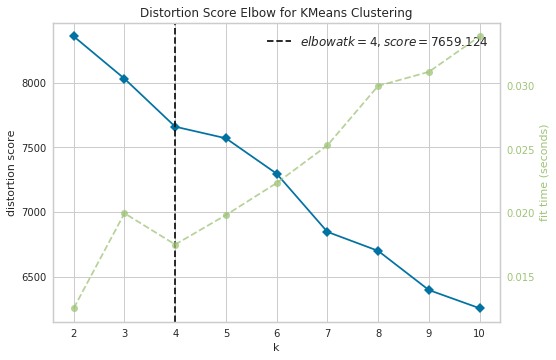

In [39]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10)
model.fit(x)
model.show()

The best option is to only divide into two clusters as per the distortion Score, re running with 2 clusters: 

In [40]:
kclusters = 2
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [41]:
del neighborhoods_venues_sorted['Cluster Labels']



In [42]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bronx_merged2 = bronx_data
bronx_merged2 = bronx_merged2.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bronx_merged2.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,1,Pharmacy,Deli / Bodega,Ice Cream Shop,Dessert Shop,Sandwich Place,Laundromat,Gas Station,Donut Shop,Women's Store,Eastern European Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,1,Fast Food Restaurant,Pizza Place,Discount Store,Bus Station,Basketball Court,Baseball Field,Grocery Store,Park,Bagel Shop,Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,1,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Intersection,Seafood Restaurant,Pizza Place,Bus Stop,Bowling Alley,Metro Station
3,Bronx,Fieldston,40.895437,-73.905643,0,Plaza,Bus Station,Women's Store,Donut Shop,Food,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Electronics Store
4,Bronx,Riverdale,40.890834,-73.912585,0,Park,Bus Station,Plaza,Baseball Field,Bank,Gym,Locksmith,Dive Bar,Dessert Shop,Food


In [43]:
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged2['Latitude'], bronx_merged2['Longitude'], bronx_merged2['Neighborhood'], bronx_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2